In [1]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
os.environ["TORCH_USE_CUDA_DSA"] = "1"

In [2]:
import torch

print(torch.cuda.is_available())

True


In [3]:
text_doc = "resources/images/lightfootcat/images/extracted_text.txt"
divisions = ["Dicotyledones", "Monocotyledones", "Pteridophyta", "Hepaticae", "Algae"]#
prompt = "resources/prompts/lightfootcat_prompt.yaml"
images = "resources/images/lightfootcat/images/cropped/"

text_doc2 = "resources/images/hanbury/extracted_text.txt"
divisions2 = ["Dicotyledones", "GYMNOSPERMEAE", "Monocotyledones"]
prompt1 = "resources/prompts/hanbury_prompt.yaml"
images2 = "resources/images/hanbury/extracted_images/cropped"

In [4]:
from lib.model.ocr_model import OCRModel

ocr_model = OCRModel(prompt)

2025-08-04 16:05:28,779 - lib.utils.promptLoader - INFO - Loading prompt from resources/prompts/lightfootcat_prompt.yaml
2025-08-04 16:05:28,839 - lib.utils.promptLoader - INFO - Loading prompt from ./resources/settings.yaml
2025-08-04 16:05:28,881 - lib.model.base_model - INFO - Loading model: mistral7b with batch size: 1, max tokens: 4096, temperature: 0.1


/mnt/apps/users/ikarunak/conda/envs/lcat/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2025-08-04 16:05:34,463 - lib.model - INFO - Importing model: mistral7b
2025-08-04 16:05:34,465 - lib.model - INFO - Model imported successfully: mistral7b


In [5]:
import os
from natsort import natsorted
image_list = natsorted([os.path.join(images, im) for im in os.listdir(images)])

print(f"Number of images in {images}: {len(image_list)}")

Number of images in resources/images/lightfootcat/images/cropped/: 83


In [6]:
processed_images = ocr_model.process_images(image_list)

In [7]:
ocr_model.extract_text_from_image(processed_images[0])

'132 John Lightfoot\n\nDicotyledones\nACERACEAE\nAcer campestre L.\n1 folder. Acer campestre [TA]\nAcer pseudoplatanus L.\n2 folders.\nFolder 1. Acer Pseudo-Platanus\n[C]. i. “Maple. Bulls: [Bulstrode]\nPark” [JL]\nFolder 2. Acer Pseudo-Platanus\n[TA].\nAMARANTHACEAE .\nAmaranthus lividus L., Flora Europaea\n1: 110 (1964)\n1 folder. Amaranthus Blitum [TA].\ni, Cites Ray’s Syn. 1957. ii. “Blite\nAmaranth. Aug. It is often found\non Dunghills in the neighbourhood\nof London. I gather\'d this on a\nDunghill at Fulham near London"\nUL]. iii. “Amaranthus Blitum.\nMonoec: 5. and:" [JL]\nARALIACEAE\nHedera helix L.\n1 folder. Hedera Helix [TA].\nARISTOLOCHIACEAE\nAsarum europaeum L.\n1 folder. Asarum europaeum [TA].\ni. “Asarum europaeum Lin: Asara-\nbacca. Anglis. ex horto" [JL].\nBALSAMINACEAE\nImpatiens noli-tangere L.\ni d Impatiens Noli me tangere\nBETULACEAE\nAlnus glutinosa (L.) Gaertn.\n1 folder. Betula Alnus [TA].\nBetula nana L.\n1 folder. Betula nana [G].\nCAMPANULACEAE\nCampanula 

In [8]:
from pytesseract import image_to_string

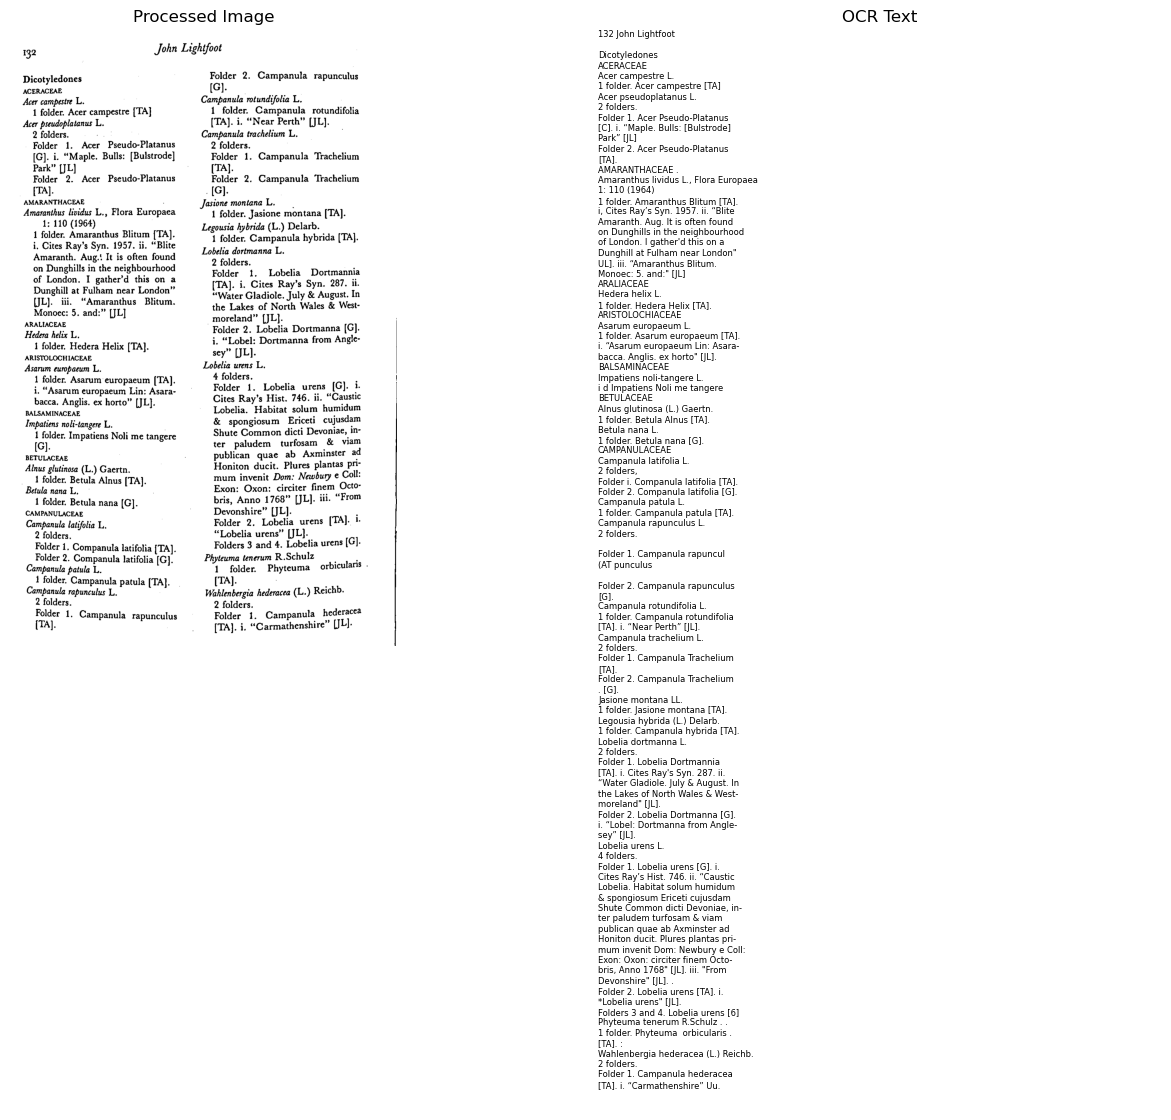

In [9]:
#Image.fromarray(processed_images[1]).show()
import matplotlib.pyplot as plt
index_ = 0
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Show the image
ax[0].imshow(processed_images[index_], cmap='gray')
ax[0].set_title("Processed Image")
ax[0].axis('off')

# Show the OCR text
text = image_to_string(processed_images[index_], lang='eng+lat', config='--psm 1')
ax[1].text(0, 1, text, fontsize=6, va='top', wrap=False)
ax[1].set_title("OCR Text")
ax[1].axis('off')

#plt.tight_layout()
plt.show()

In [10]:
print(text)

132 John Lightfoot

Dicotyledones
ACERACEAE
Acer campestre L.
1 folder. Acer campestre [TA]
Acer pseudoplatanus L.
2 folders.
Folder 1. Acer Pseudo-Platanus
[C]. i. “Maple. Bulls: [Bulstrode]
Park” [JL]
Folder 2. Acer Pseudo-Platanus
[TA].
AMARANTHACEAE .
Amaranthus lividus L., Flora Europaea
1: 110 (1964)
1 folder. Amaranthus Blitum [TA].
i, Cites Ray’s Syn. 1957. ii. “Blite
Amaranth. Aug. It is often found
on Dunghills in the neighbourhood
of London. I gather'd this on a
Dunghill at Fulham near London"
UL]. iii. “Amaranthus Blitum.
Monoec: 5. and:" [JL]
ARALIACEAE
Hedera helix L.
1 folder. Hedera Helix [TA].
ARISTOLOCHIACEAE
Asarum europaeum L.
1 folder. Asarum europaeum [TA].
i. “Asarum europaeum Lin: Asara-
bacca. Anglis. ex horto" [JL].
BALSAMINACEAE
Impatiens noli-tangere L.
i d Impatiens Noli me tangere
BETULACEAE
Alnus glutinosa (L.) Gaertn.
1 folder. Betula Alnus [TA].
Betula nana L.
1 folder. Betula nana [G].
CAMPANULACEAE
Campanula latifolia L.
2 folders,
Folder i. Companula

In [10]:
from pydantic import BaseModel, Field, root_validator

class Family(BaseModel):
    family_name: str = Field(..., description="The taxonomic family name. If not available, use \"N/A\".")
    species: list[str] = Field(default_factory=list, description="A list of species names under the family. If not available, use \"N/A\".")

class Metadata(BaseModel):
    # page_number: int = Field(..., description="The page number where the folder is located in the original document.")
    # page_header: str = Field(..., description="The header of the page where the folder is located. This is usually the family name or a related term.")
    families: list[Family] = Field(default_factory=list, description="A list of families with their species names. If not available, use \"N/A\".")

In [11]:

system_prompt = (
    "You are an expert in extracting key information from OCR .\n"
    "Your task is to find all occurences of family names in the OCR text\n"
    "Do not generate any family names that are not present in the provided text.\n"
    "Do not assume any family names that are not explicitly mentioned in the text.\n"
    "Once you have extracted the family names, return them in a list format.\n"
    f"Schema: {Metadata.schema_json(indent=2)}\n"
)

user_prompt = (
    "Please extract the above information from the OCR text provided.\n"
    "ONLY return the JSON object with the family names.\n"
    f"OCR'd text: \n\n{text}\n"
)
conversation = [{"role": "system", "content": system_prompt},
                {"role": "user", "content": user_prompt}]

output = ocr_model.model(conversation=conversation)

print(output[0])

Loading model for [mistralai/Mistral-7B-Instruct-v0.3] to device [cuda]


Loading checkpoint shards: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]


Loading processor for [mistralai/Mistral-7B-Instruct-v0.3] to device [cuda:0]
2025-08-01 16:15:47,194 - lib.model.hf_models.hf_model - WARNING - Pad token is None. Setting pad token to eos token.


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


{
  "title": "Metadata",
  "type": "object",
  "properties": {
    "families": [
      {
        "family_name": "ACERACEAE",
        "species": ["Acer campestre L.", "Acer pseudoplatanus L."]
      },
      {
        "family_name": "AMARANTHACEAE",
        "species": ["Amaranthus lividus L."]
      },
      {
        "family_name": "ARALIACEAE",
        "species": ["Hedera helix L."]
      },
      {
        "family_name": "ARISTOLOCHIACEAE",
        "species": ["Asarum europaeum L."]
      },
      {
        "family_name": "BALSAMINACEAE",
        "species": ["Impatiens noli-tangere L."]
      },
      {
        "family_name": "BETULACEAE",
        "species": ["Alnus glutinosa (L.) Gaertn.", "Betula nana L."]
      },
      {
        "family_name": "CAMPANULACEAE",
        "species": ["Campanula latifolia L.", "Campanula patula L.", "Campanula rapunculus L.", "Campanula rotundifolia L.", "Campanula trachelium L.", "Jasione montana LL.", "Legousia hybrida (L.) Delarb.", "Lobelia dortma

In [12]:
eval(output[0])["properties"]

{'families': [{'family_name': 'ACERACEAE',
   'species': ['Acer campestre L.', 'Acer pseudoplatanus L.']},
  {'family_name': 'AMARANTHACEAE', 'species': ['Amaranthus lividus L.']},
  {'family_name': 'ARALIACEAE', 'species': ['Hedera helix L.']},
  {'family_name': 'ARISTOLOCHIACEAE', 'species': ['Asarum europaeum L.']},
  {'family_name': 'BALSAMINACEAE', 'species': ['Impatiens noli-tangere L.']},
  {'family_name': 'BETULACEAE',
   'species': ['Alnus glutinosa (L.) Gaertn.', 'Betula nana L.']},
  {'family_name': 'CAMPANULACEAE',
   'species': ['Campanula latifolia L.',
    'Campanula patula L.',
    'Campanula rapunculus L.',
    'Campanula rotundifolia L.',
    'Campanula trachelium L.',
    'Jasione montana LL.',
    'Legousia hybrida (L.) Delarb.',
    'Lobelia dortmanna L.',
    'Lobelia urens L.']},
  {'family_name': 'Phyteuma', 'species': ['Phyteuma tenerum R.Schulz']},
  {'family_name': 'Wahlenbergia',
   'species': ['Wahlenbergia hederacea (L.) Reichb.']}]}

### Use context managers for each image to organise and clean the data